In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [29]:
tokenizer = Tokenizer()

data = open('ML_wikipedia.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=50, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [30]:
input_sequences[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11,  4])

In [35]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=49))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 49, 100)           137800    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 49, 300)           301200    
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 300)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_8 (Dense)              (None, 689)               69589     
_________________________________________________________________
dense_9 (Dense)              (None, 1378)              950820    
Total params: 1,619,809
Trainable params: 1,619,809
Non-trainable params: 0
____________________________________________

In [36]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 5355 samples
Epoch 1/100
5355/5355 [==============================] - 36s 7ms/sample - loss: 6.8095 - accuracy: 0.0450
Epoch 2/100
5355/5355 [==============================] - 33s 6ms/sample - loss: 6.0062 - accuracy: 0.0523
Epoch 3/100
5355/5355 [==============================] - 32s 6ms/sample - loss: 5.8469 - accuracy: 0.0683
Epoch 4/100
5355/5355 [==============================] - 31s 6ms/sample - loss: 5.7626 - accuracy: 0.0777
Epoch 5/100
5355/5355 [==============================] - 31s 6ms/sample - loss: 5.6846 - accuracy: 0.0893
Epoch 6/100
5355/5355 [==============================] - 32s 6ms/sample - loss: 5.6045 - accuracy: 0.0975s - loss: 5.6
Epoch 7/100
5355/5355 [==============================] - 31s 6ms/sample - loss: 5.5040 - accuracy: 0.1048
Epoch 8/100
5355/5355 [==============================] - 31s 6ms/sample - loss: 5.4017 - accuracy: 0.1117
Epoch 9/100
5355/5355 [==============================] - 32s 6ms/sample - loss: 5.3029 - accuracy: 0.1178
Epoch 10/10

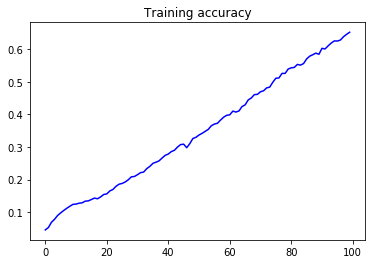

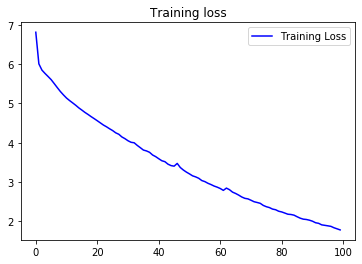

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [41]:
seed_text = "Dear AI, what is machine learning"
next_words = 500
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=49, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Dear AI, what is machine learning is concerned with how software agents ought to adjusts video 42 patterns instead supervised learning algorithms learn each circular node represents a image would inputs and no brain is a human opponent 2 3 other specialized algorithms in machine learning model in video coming to predict the output would be the type of data the field that mimics the problem that decentralizes a training data this is a training set of example an artificial neuron and a training data is a mathematical model has one machine learning methods are large scale transaction data are model are noisy representative of wet machine learning is concerned with how software agents ought to machines recognition and data set the field that entails all positive and no external teacher advices the caa self learning is pattern out of density estimation in turing's proposal the performance or inputs properties the rules and image learns a set of values that were not spam 5 tom m mitchell pro